In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

#import dataset and store in variable dataset. View the statistics overview of the dataset

cleaned_dataset = pd.read_csv("/Users/moo/Desktop/MSc Business Analytics/BEMM457 Topics in business analytics/Final project/BEMM457 - Analysis on factors affecting high-school student performance and alcoholism/cleaned_dataset.csv")
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    634 non-null    int64  
 1   Gender                        634 non-null    int64  
 2   Parental_Status               634 non-null    int64  
 3   Mother_Education              634 non-null    int64  
 4   Father_Education              634 non-null    int64  
 5   Weekly_Study_Time             634 non-null    int64  
 6   Extra_Educational_Support     634 non-null    int64  
 7   Parental_Educational_Support  634 non-null    int64  
 8   Private_Tutoring              634 non-null    int64  
 9   Extracurricular_Activities    634 non-null    int64  
 10  Desire_Graduate_Education     634 non-null    int64  
 11  Good_Family_Relationship      634 non-null    int64  
 12  Alcohol_Weekdays              634 non-null    int64  
 13  Alcoh

In [370]:
#Figure 14: Logistic regression classification report, confusion matrix, and ROC-AUC curve
#Allocate training data: 70% and testing data: 30%

cleaned_dataset['Pass_Fail'] = (cleaned_dataset['Average_Grade'] >= 10).astype(int)

preferred_variables = [
    "Alcohol_Weekdays",
    "School_Absence_BoxCox",
    "Mother_Education",
    "Good_Family_Relationship",
    "Weekly_Study_Time",
    "Desire_Graduate_Education",
    "Gender"
]

X = cleaned_dataset[preferred_variables]
y = cleaned_dataset['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.36      0.49        44
           1       0.84      0.97      0.90       147

    accuracy                           0.83       191
   macro avg       0.80      0.66      0.69       191
weighted avg       0.82      0.83      0.80       191

Confusion Matrix:
 [[ 16  28]
 [  5 142]]
ROC-AUC Score: 0.8157854050711194


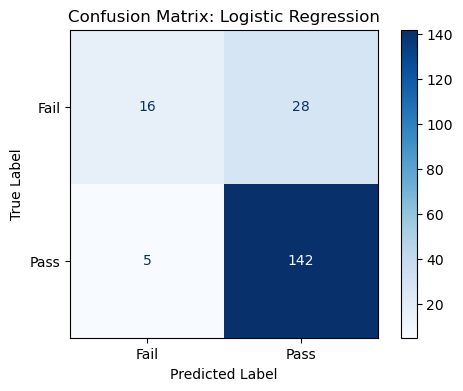

In [372]:
#Figure 14: Logistic regression classification report, confusion matrix, and ROC-AUC curve

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Fail", "Pass"]).plot(cmap="Blues", ax=plt.gca())
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<Figure size 800x600 with 0 Axes>

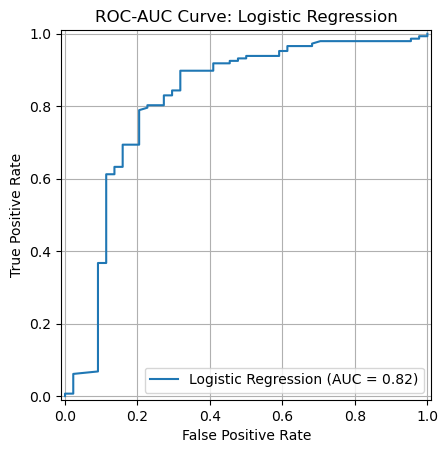

In [374]:
#Figure 14: Logistic regression classification report, confusion matrix, and ROC-AUC curve

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="Logistic Regression")
plt.title("ROC-AUC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

In [376]:
#Figure 15: Class-weighted logistic regression classification report, confusion matrix, and ROC-AUC curve
#Applied class-weighted to the logistic regression to address class imbalance and improve recall for predicting failing students
#Allocate training data: 70% and testing data: 30%

cleaned_dataset['Pass_Fail'] = (cleaned_dataset['Average_Grade'] >= 10).astype(int)

preferred_variables = [
    "Alcohol_Weekdays",
    "School_Absence_BoxCox",
    "Mother_Education",
    "Good_Family_Relationship",
    "Weekly_Study_Time",
    "Desire_Graduate_Education",
    "Gender"
]

X = cleaned_dataset[preferred_variables]
y = cleaned_dataset['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_balanced = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg_balanced.fit(X_train, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test)
y_pred_prob_balanced = log_reg_balanced.predict_proba(X_test)[:, 1]

print("Classification Report (Class Weighted Logistic Regression):\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix (Class Weighted Logistic Regression):\n", confusion_matrix(y_test, y_pred_balanced))
print("ROC-AUC Score (Class Weighted Logistic Regression):", roc_auc_score(y_test, y_pred_prob_balanced))

Classification Report (Class Weighted Logistic Regression):
               precision    recall  f1-score   support

           0       0.51      0.80      0.62        44
           1       0.93      0.78      0.84       147

    accuracy                           0.78       191
   macro avg       0.72      0.79      0.73       191
weighted avg       0.83      0.78      0.79       191

Confusion Matrix (Class Weighted Logistic Regression):
 [[ 35   9]
 [ 33 114]]
ROC-AUC Score (Class Weighted Logistic Regression): 0.8188775510204083


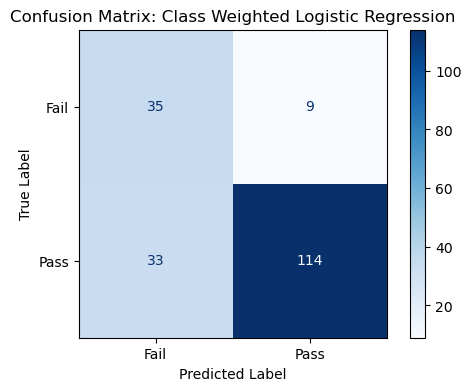

In [378]:
#Figure 15: Class-weighted logistic regression classification report, confusion matrix, and ROC-AUC curve

conf_matrix = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Fail", "Pass"]).plot(cmap="Blues", ax=plt.gca())
plt.title("Confusion Matrix: Class Weighted Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<Figure size 800x600 with 0 Axes>

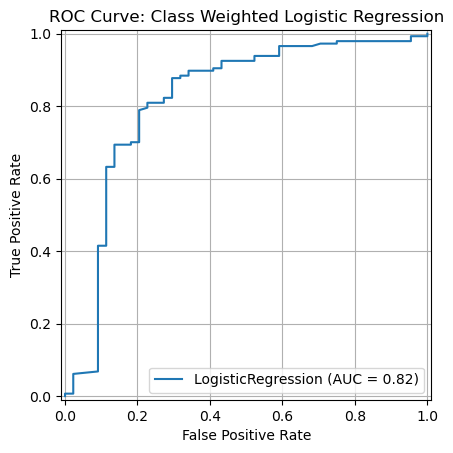

In [380]:
#Figure 15: Class-weighted logistic regression classification report, confusion matrix, and ROC-AUC curve

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg_balanced, X_test, y_test)
plt.title("ROC Curve: Class Weighted Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

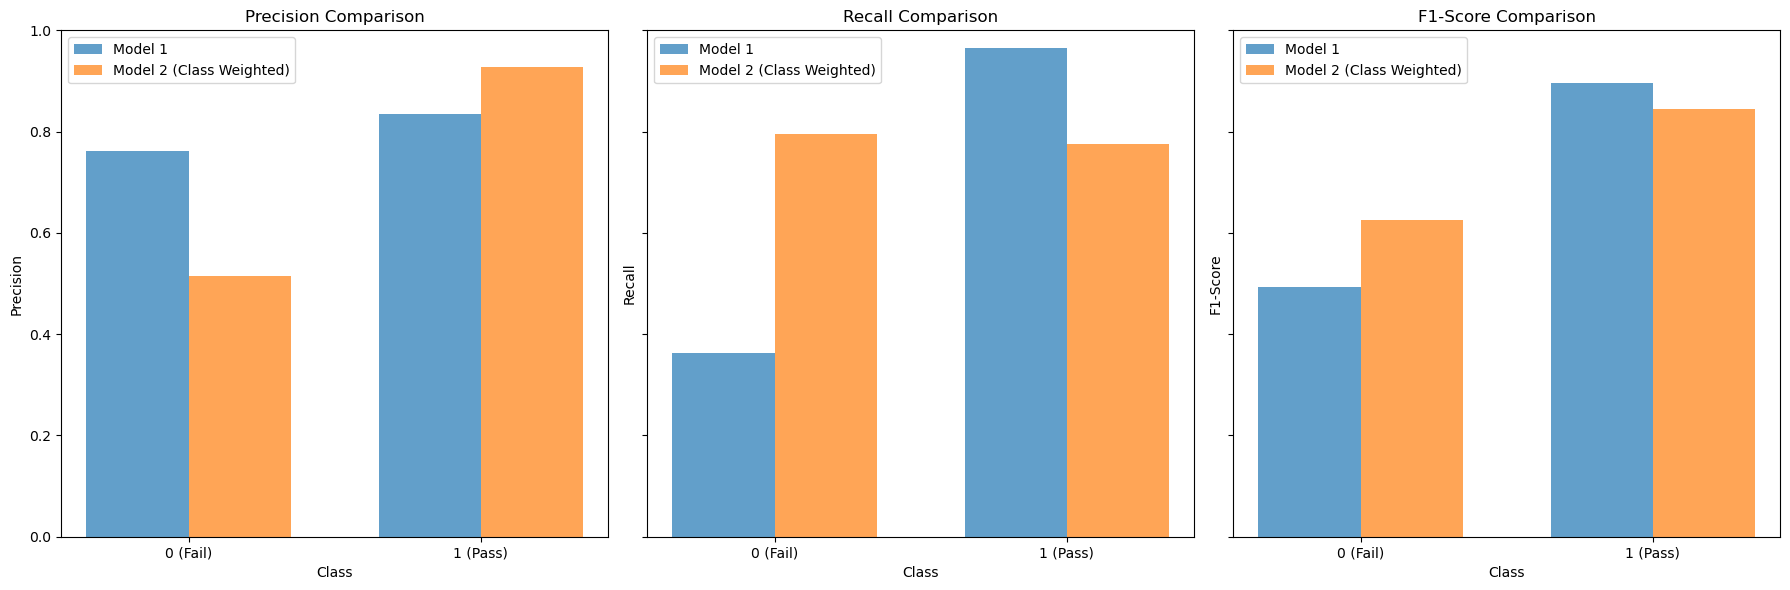

In [384]:
#Figure 16: Model classification report comparison

report_1 = classification_report(y_test, y_pred, output_dict=True)
report_2 = classification_report(y_test, y_pred_balanced, output_dict=True)

report_df_1 = pd.DataFrame(report_1).transpose().drop(["accuracy", "macro avg", "weighted avg"], axis=0)
report_df_2 = pd.DataFrame(report_2).transpose().drop(["accuracy", "macro avg", "weighted avg"], axis=0)

metrics_1 = report_df_1[["precision", "recall", "f1-score"]].rename(columns={"precision": "Precision", "recall": "Recall", "f1-score": "F1-Score"})
metrics_2 = report_df_2[["precision", "recall", "f1-score"]].rename(columns={"precision": "Precision", "recall": "Recall", "f1-score": "F1-Score"})

x_labels = ["0 (Fail)", "1 (Pass)"]
bar_width = 0.35
x = range(len(x_labels))

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(["Precision", "Recall", "F1-Score"]):
    axes[i].bar([p - bar_width / 2 for p in x], metrics_1[metric], bar_width, label="Model 1", alpha=0.7)
    axes[i].bar([p + bar_width / 2 for p in x], metrics_2[metric], bar_width, label="Model 2 (Class Weighted)", alpha=0.7)
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(x_labels)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [386]:
#Conduct k-fold cross-validation (5 folds)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    log_reg_balanced, X, y, 
    cv=kfold, scoring=make_scorer(roc_auc_score, needs_proba=True)
)

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))
print("Standard Deviation ROC-AUC:", np.std(cv_scores))

Cross-Validation ROC-AUC Scores: [0.71537002 0.75932954 0.8054481  0.77321083 0.80612577]
Mean ROC-AUC: 0.7718968521665441
Standard Deviation ROC-AUC: 0.033622171165579355


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


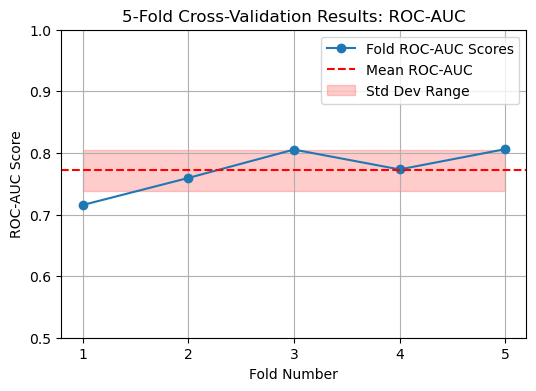

In [388]:
#Figure 17: K-fold cross-validation ROC-AUC scores

cv_scores = cross_val_score(
    log_reg_balanced, X, y, 
    cv=kfold, scoring=make_scorer(roc_auc_score, needs_proba=True)
)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', label="Fold ROC-AUC Scores")
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label="Mean ROC-AUC")
plt.fill_between(
    range(1, len(cv_scores) + 1),
    np.mean(cv_scores) - np.std(cv_scores),
    np.mean(cv_scores) + np.std(cv_scores),
    color='r', alpha=0.2, label="Std Dev Range"
)
plt.title("5-Fold Cross-Validation Results: ROC-AUC")
plt.xlabel("Fold Number")
plt.ylabel("ROC-AUC Score")
plt.ylim(0.5, 1.0)  # Set limits to emphasize variability
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()